### DSContexAI -- Contextualizing model's decisions with natural language explanations

This notebook serves as an introduction to using our libray DSContexAI.

The dataset we are using is [Titanic dataset](https://www.kaggle.com/c/titanic/data), which was not employed during the development of our library.
We test the library on three commonly used models: XGBoost, Random Forest, and CatBoost.

**To install our library run: pip install dscontexai**

In [51]:
# import our library
from dscontexai.generate_report import general

# import other libraries
import pickle
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

### Loading the data

In [52]:
# Read the data
df1 = pd.read_csv('data/train.csv')
df2 = pd.read_csv('data/test.csv')
merge = pd.read_csv('data/gender_submission.csv')

# Concatenate train and test data
df = pd.concat([df1, df2], axis=0)

# Drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# Merge on PassengerId column using an outer join
df = pd.merge(df, merge, on='PassengerId', how='outer', suffixes=('_train', '_pred'))

# Combine the Survived columns
df['Survived'] = df['Survived_train'].combine_first(df['Survived_pred'])

# Drop the temporary Survived columns
df = df.drop(columns=['Survived_train', 'Survived_pred'])

# Drop all rows with missing values
df = df.dropna()

# Change pclass to Ticket class and sibsp to Number of siblings/spouses aboard, parch to Number of parents/children aboard
df = df.rename(columns={'Pclass': 'Ticket class', 'SibSp': 'Number of siblings/spouses aboard', 'Parch': 'Number of parents/children aboard'})

# use cat codes for the categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

# drop the PassengerId column
df = df.drop(columns=['PassengerId'])

# Save the result to a CSV file
df.to_csv('data/titanic.csv', index=False)

# Split the data into X and y
X = df.drop(columns=['Survived'])
y = df['Survived']

### Setup

For running functions from our library, you need to provide a trained model, a dataset, and a configuration file.

Detailed explanation of how the configuration file should look like is provided in the library description and README file of the project. 

For this use-case, our configuration file is saved in dscontexai/titanic/configurations/titanic.json file.

### XGBoost model

In [53]:
model = xgb.XGBClassifier()
model.fit(X, y)

# Save the model
with open('models/xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

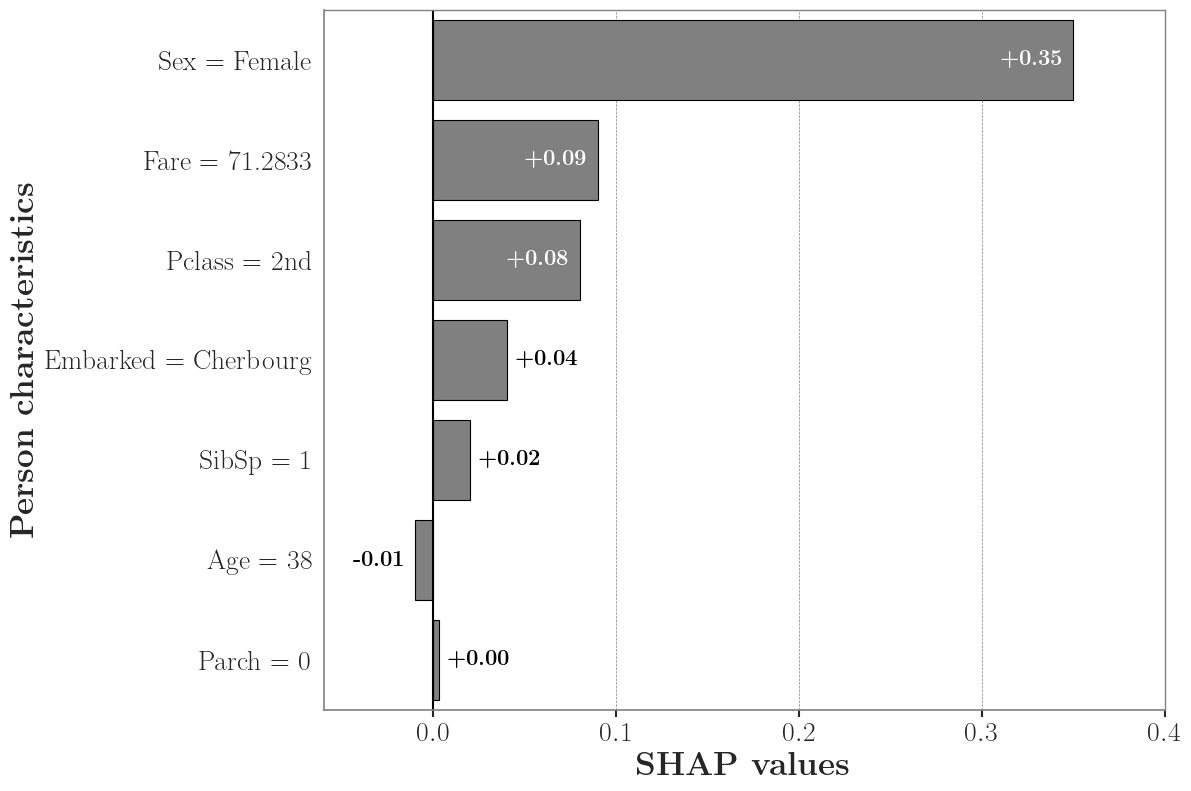

In [54]:
general('models/xgb_model.pkl','data/titanic.csv','configurations/titanic.json',1)

**You can see the generated report in dscontexai/titanic/prototypes/output_1.pdf.**

### CatBoost model

In [ ]:
model = CatBoostClassifier()
model.fit(X, y)
 
with open('models/catboost_model.pkl', 'wb') as f:  
    pickle.dump(model, f) 

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


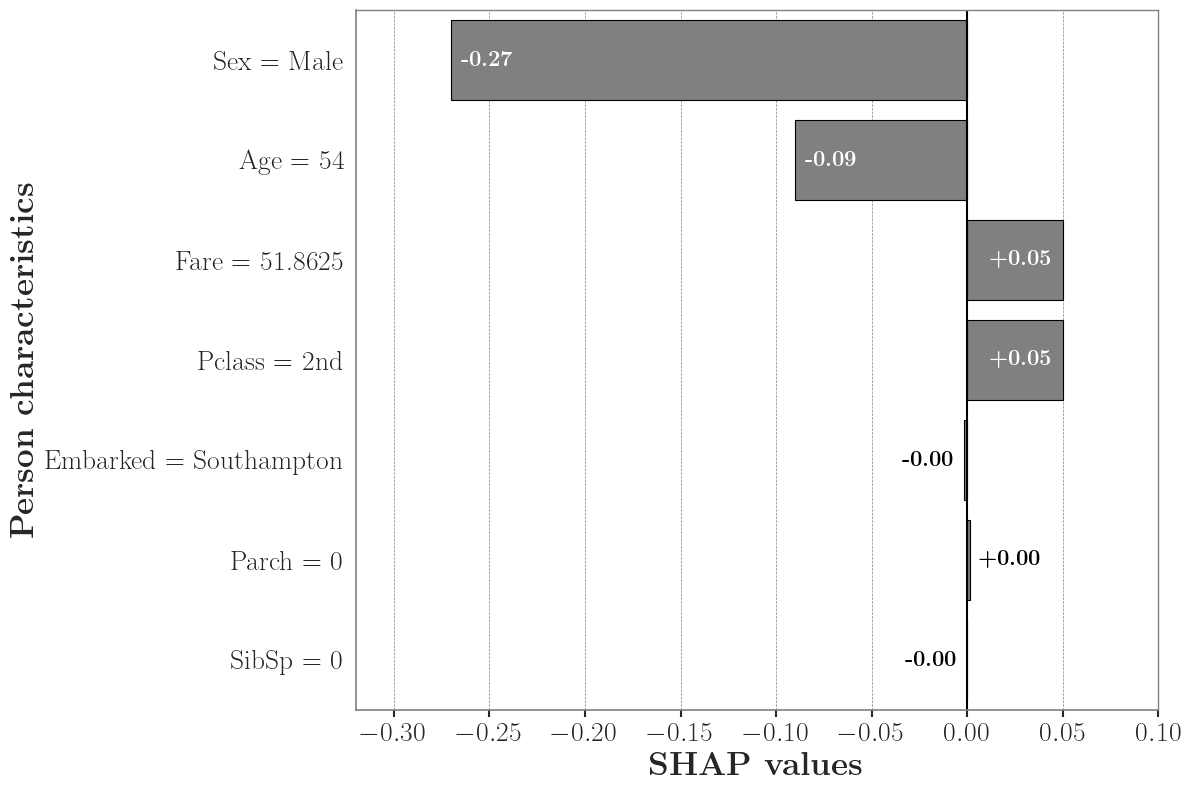

In [56]:
general('models/catboost_model.pkl','data/titanic.csv','configurations/titanic.json', 5)

**You can see the generated report in dscontexai/titanic/prototypes/output_3.pdf.**

### Random Forest model

In [57]:
model = RandomForestClassifier()
model.fit(X, y)

with open('models/rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


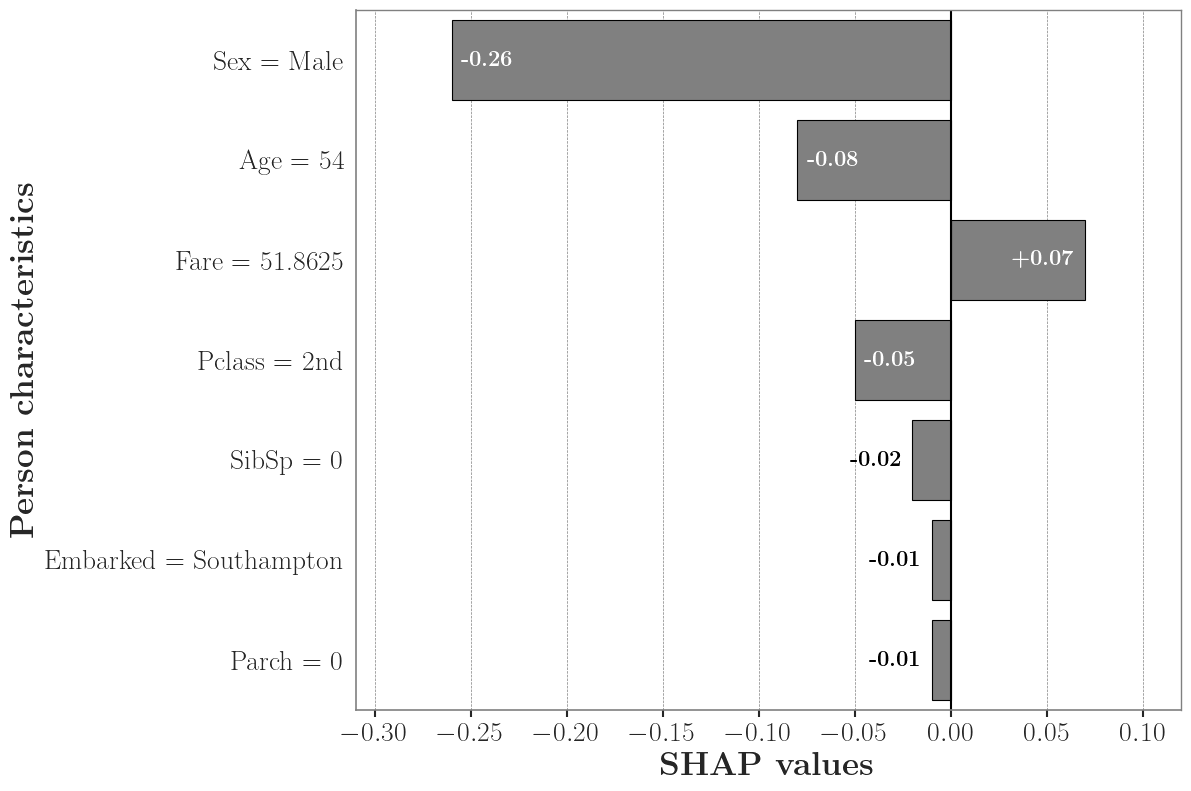

In [58]:
general('models/rf_model.pkl','data/titanic.csv','configurations/titanic.json', 5)

**You can see the generated report in dscontexai/titanic/prototypes/output_5.pdf.**